# 1) Import our libraries

In [357]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import math

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from scipy import stats
from scipy.stats import kurtosis, skew

%matplotlib inline

# 2) Load the Data

In [358]:
# creating a dataframe

price_df = pd.read_csv('oil_price.csv')

# print the first 5 row of data
price_df.head()

,date,exon_price,oil_price
0,2014-03-28,97.699997,106.64
1,2014-03-31,97.680000,105.95
2,2014-04-01,97.730003,105.70
3,2014-04-02,97.949997,103.37
4,2014-04-03,97.930000,104.88


In [359]:
# changing the date time to proper formate 
price_df['date'] = pd.to_datetime(price_df['date'])

# changing the index to date time 
price_df.set_index('date', inplace=True)

In [360]:
# printing to check whether index have change or not
price_df.head()

,exon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70
2014-04-02,97.949997,103.37
2014-04-03,97.930000,104.88


In [361]:
# we have change the date datatype to actual datetime formate

price_df.index.dtype

dtype('<M8[ns]')

# 3) Clean the data

In [362]:
# cheking the datatupe 

price_df.dtypes

exon_price    float64
oil_price     float64
dtype: object

In [363]:
# renaming the column
price_df = price_df.rename(columns={'exon_price': 'exxon_price'})

price_df.head(3)

,exxon_price,oil_price
date,,
2014-03-28,97.699997,106.64
2014-03-31,97.680000,105.95
2014-04-01,97.730003,105.70


In [364]:
# checking for missing value

# oil_price column is true, that means that it got missing values
display(price_df.isna().any())

exxon_price    False
oil_price       True
dtype: bool

In [365]:
# dropping missing values

price_df = price_df.dropna()

In [167]:
# after dropping we can see that there is not missing values

price_df.isna().any()

exxon_price    False
oil_price      False
dtype: bool

# 4) Explore the Data

## Building a scatter plot

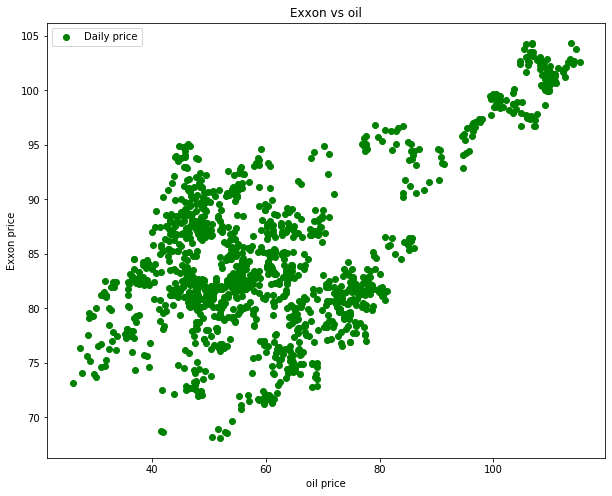

In [303]:
x = price_df['oil_price']
y = price_df['exxon_price']

plt.scatter(x, y, color='green', label="Daily price", )

# formate the scatter plot
plt.rcParams["figure.figsize"] = [10,8]
plt.title('Exxon vs oil')
plt.ylabel('Exxon price')
plt.xlabel('oil price')
plt.legend()
plt.show()


In [200]:
# measure the correlation between independent variable and independent variable

# greater then 0.8 very strong relationship
# less the 0.6 strong relationship
# less then 0.4 very moderate relationship
# less then 0.8 very weak relationship
# less then 0 very weak  relationship

price_df.corr()

,exxon_price,oil_price
exxon_price,1.00000,0.60132
oil_price,0.60132,1.00000


there is a strong relationship, as we can see its grater then 0.6

In [201]:
# cretae a statistical sumarry

price_df.describe()

,exxon_price,oil_price
count,1248.000000,1248.000000
mean,84.802796,61.935000
std,7.424687,19.288424
min,68.120003,26.010000
25%,80.190002,48.162500
50%,83.024998,57.120000
75%,88.529999,70.725000
max,104.379997,115.190000


## checking for outliers and skewness

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2c67b910>,
      dtype=object)

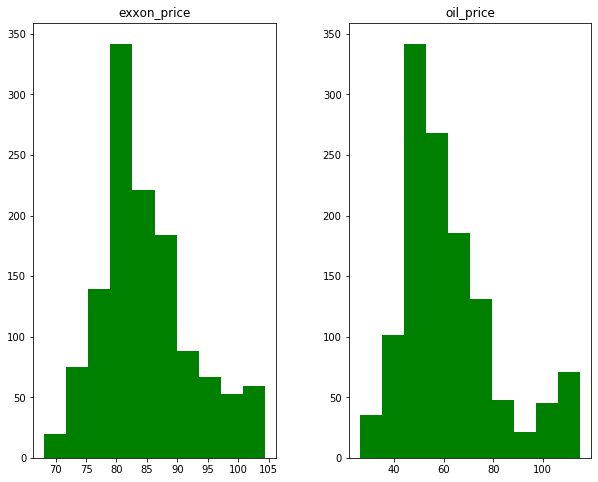

In [212]:
# ploating a histogram to check the skewness of data

price_df.hist(grid=False, color='green')

- we can see that some of the data does appear to be skewed, but not too much.
- we should verify this with some measurement. 
- two very good metrix to measure -> 1)kurtosis and 2)skew

In [229]:
# calculate excess kurtosis using fisher method. The alterantive method is pearson which calculat regular kurtosis

exxon_kurtosis =  kurtosis(price_df['exxon_price'], fisher=True)
oil_kurtosis = kurtosis(price_df['oil_price'], fisher=True)

# Calculate the skewness
exxon_skew = skew(price_df['exxon_price'])
oil_skew = skew(price_df['oil_price'])

display('Exxon kurtosis: {:.3}'.format(exxon_kurtosis))  # looks fine
display('Oil kurtosis: {:.3}'.format(oil_kurtosis))  # looks fine

display('Exxon skew: {:.3}'.format(exxon_skew)) # moderate skewed
display('Oil skew: {:.3}'.format(oil_skew)) # moderate skewed

'Exxon kurtosis: 0.0884'

'Oil kurtosis: 0.532'

'Exxon skew: 0.66'

'Oil skew: 1.02'


## Kurtosis

- Any distribution with kurtosis ≈3 (excess ≈0) is called mesokurtic. This is a normal distribution
- Any distribution with kurtosis <3 (excess kurtosis <0) is called platykurtic. Tails are shorter and thinner, and often its central peak is lower and broader.
- Any distribution with kurtosis >3 (excess kurtosis >0) is called leptokurtic. Tails are longer and fatter, and often its central peak is higher and sharper.


## Skewness
- If skewness is less than −1 or greater than +1, the distribution is highly skewed.
- If skewness is between −1 and −½ or between +½ and +1, the distribution is moderately skewed.
- If skewness is between −½ and +½, the distribution is approximately symmetric.

In [335]:
# perform a kurtosis test
display('Exxon')
display(stats.kurtosistest(price_df['exxon_price']))
display('Oil')
display(stats.kurtosistest(price_df['oil_price']))

# perfrom a skewed test
display('Exxon')
display(stats.skewtest(price_df['exxon_price']))
display('Oil')
display(stats.skewtest(price_df['oil_price']))

'Exxon'

KurtosistestResult(statistic=0.7185349375030217, pvalue=0.47242751383320714)

'Oil'

KurtosistestResult(statistic=3.193868719980946, pvalue=0.0014037993965471192)

'Exxon'

SkewtestResult(statistic=8.770169400598549, pvalue=1.7839768456341654e-18)

'Oil'

SkewtestResult(statistic=12.471137868018896, pvalue=1.0728306198159925e-35)

# 5) Build the Model

## split the  data
- The very first thing we should do is to split the data into train set and test set.
- By convention we will take 80% data for training the model and 20% for testing 

In [378]:
# defining our input variable x and output variable y

y = price_df.drop('oil_price', axis=1)
x = price_df[['oil_price']]

# spliting X and Y into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 1)

## Create & Fit the model

In [245]:
# creating a linear regresson model object
regression_model = LinearRegression()

# pass the x_train and y_train dataset
regression_model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# checking the output
- letc check the coefficient of each independent variable in our model
- we will look at out intercept of regressoin formula

In [262]:
# let check the coefficient of our model and the intercept
intercept = regression_model.intercept_[0]
coefficient = regression_model.coef_[0][0]


print("The Coefficient for our model is {:.2}".format(coefficient))
print("The intercept for our model is {:.4}".format(intercept))

The Coefficient for our model is 0.23
The intercept for our model is 70.55


- with the above result we can say that single unit increase in oil price is associated with 0.23 increase in the price of Exxon_mobile stock 

# Taking a Single Prediction

In [337]:
# testing the prediction
singel_prediction = regression_model.predict([[45.78]])

print('If oil price is 45.78 then Exxon price is  {:.3}'.format(singel_prediction[0][0]))

If oil price is 45.78 then Exxon price is  81.1


To interpret the output, we would say that given a barrel of oil for 67.33 we would predict Exxon Mobile to be trading for 85.95.

## Making Multiple Predictions at Once

In [279]:
# Get multiple prediction with the test dataset
y_predict = regression_model.predict(x_test)

# showing the first 5 prediction
display(y_predict[0:5])


array([[82.39718427],
       [83.0168246 ],
       [81.66738567],
       [79.18882438],
       [84.12070236]])

# 6) Evaluating the Model

- we need to check how out model is doing, whether the model is predicting with decent accuracy or not
- we need to test all this with few metrice
- we will recreate our same model using statsmodels.api library

In [344]:
# defining an input
x2 = sm.add_constant(x)

# create OLS model
model = sm.OLS(y, x2)

# fit the data
estimate = model.fit()

# Confidence Intervals
First, let us calculate confidence intervals. Keep in mind that by default that the calculated using 95% intervals. We interpret this by saying if the population from which this sample was drawn was sampled 100 times. Approximately 95 of those confidence intervals would contain the "true" coefficient.

Why do we provide a confidence range? Well, it comes from the fact that we only have a sample of the population, not the entire population itself. Because of this concept, means that the "true" coefficient could exist in the interval below or it couldn't, but we cannot say for sure. We provide some uncertainty by providing a range, usually 95% interval, where the coefficient is probably in.

In [345]:
# make sure confident intervals, 95 by default
estimate.conf_int()

,0,1
const,69.358126,71.57579
oil_price,0.214372,0.24856


Interpreting the output above, we would say that with 95% confidence the oil_price coefficient exists between 0.214 & 0.248.

## Hypothesis Testing

Hypothesis Testing
- Null Hypothesis: There is no relationship between the price of oil and the price of Exxon.
    - The coefficient equals 0.
- Alternative Hypothesis: There is a relationship between the price of oil and the price of Exxon.
    - The coefficient does not equal to 0.
- If we reject the null, we are saying there is a relationship, and the coefficient does not equal 0.

- If we fail to reject the null, we are saying there is no relationship, and the coefficient does equal 0.

In [289]:
# estimate the p-value
estimate.pvalues

const         0.000000e+00
oil_price    1.423529e-123
dtype: float64

The p-value represents the probability that the coefficient equals 0. We want a p-value that is less than 0.05 if it is we can reject the null hypothesis. In this case, the p-value for the oil_price coefficient is much lower than 0.05, so we can reject the null hypothesis and say that there is a relationship and that we believe it to be between oil and the price of Exxon.

# 7) Check Model Fit

To check how well out data fit the model, we wil compre with the predicted value and the actual value, that will
be out residual.

From here we can calculate the few metrics to help quanity how well our model fit the data. Few popular metrics are:
- **Mean Absolute Error (MAE)**: Is the mean of the absolute value of the errors. This metric gives an idea of magnitude but no idea of direction (too high or too low).

- **Mean Squared Error (MSE):** Is the mean of the squared errors.MSE is more popular than MAE because MSE "punishes" more significant errors.

- **Root Mean Squared Error (RMSE):** Is the square root of the mean of the squared errors. RMSE is even more favored because it allows us to interpret the output in y-units.

In [293]:
# calculatr MSE
model_mse = mean_squared_error(y_predict, y_test)

# calculate MAE
model_mae = mean_absolute_error(y_predict, y_test)

# Cacculate RMSE
model_rmse = math.sqrt(modeL_mae)

# display the output
print("MSE {:.3}".format(model_mse))
print("MAE {:.3}".format(model_mae))
print("RMSE {:.3}".format(model_rmse))

MSE 38.8
MAE 5.05
RMSE 2.25


# R-Squared

R-square provide the goodness of fit, tell how well the data fit the model

In [298]:
model_r2 = r2_score(y_test, y_predict)
print("R2: {:.2}".format(model_r2))

R2: 0.36


With R-Square & adjusted R-Square, we have to be careful when interpreting the output because it depends on what our the goal is. The R-squared is generally of secondary importance unless the main concern is using the regression equation to make accurate predictions. It boils down to the domain-specific problem, and many people would argue an R-Square of .36 is great for stocks because it is hard to control for all the external factors, while others may not agree.

## Create a Summary of the Model Output

In [296]:
print(estimate.summary())

                            OLS Regression Results                            
Dep. Variable:            exxon_price   R-squared:                       0.362
Model:                            OLS   Adj. R-squared:                  0.361
Method:                 Least Squares   F-statistic:                     705.7
Date:                Fri, 01 May 2020   Prob (F-statistic):          1.42e-123
Time:                        17:21:23   Log-Likelihood:                -3992.3
No. Observations:                1248   AIC:                             7989.
Df Residuals:                    1246   BIC:                             7999.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         70.4670      0.565    124.678      0.0

## Plot the Residuals

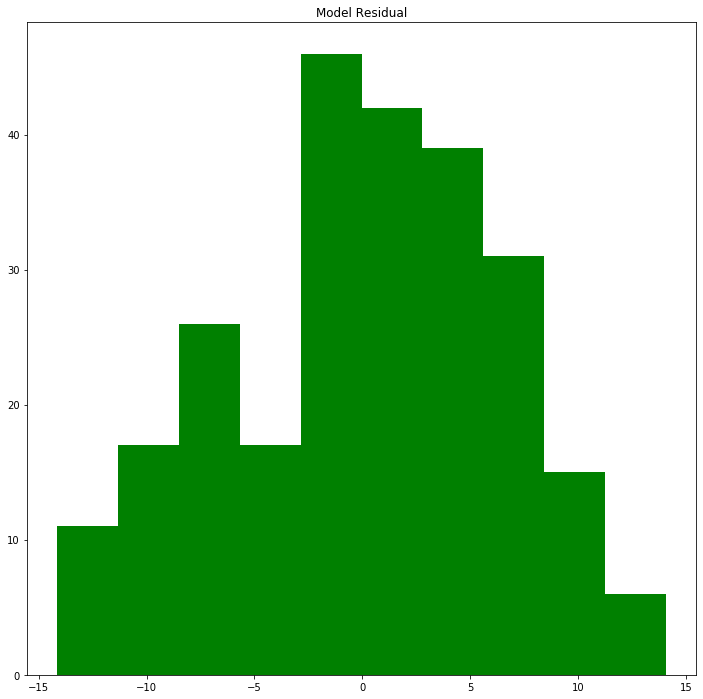

In [321]:
# grabing the residual and calling the hist() method

(y_test - y_predict).hist(grid=False, color="green")
plt.title('Model Residual')
plt.show()

## Plotting our Line

Oil coefficient: 0.23
Mean squared error: 38.75
Root Mean squared error: 6.225
R2 score: 0.36


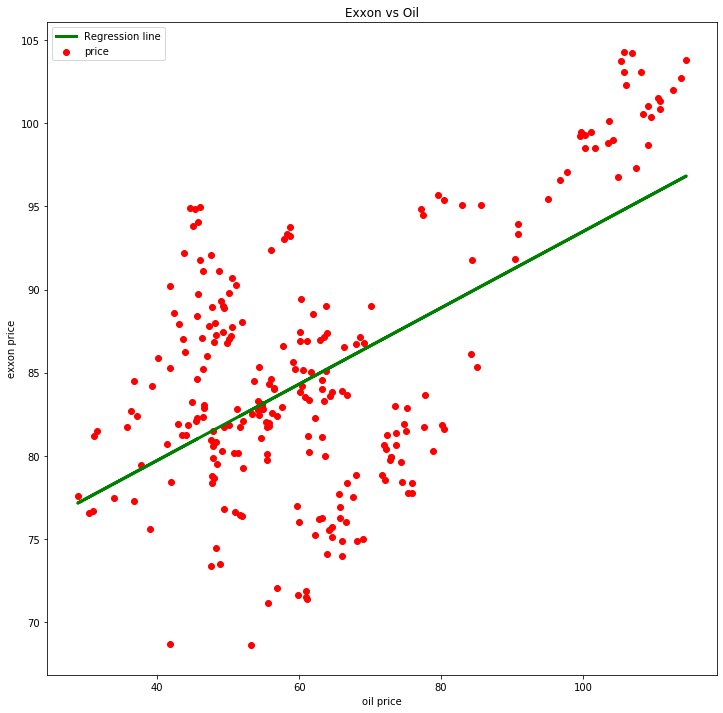

In [328]:
# plot output

plt.scatter(x_test, y_test, color='red', label='price')
plt.plot(x_test, y_predict, color='green', linewidth = 3, linestyle = '-', label = 'Regression line')
plt.title('Exxon vs Oil')
plt.xlabel('oil price')
plt.ylabel('exxon price')
plt.legend()
plt.show

# The coefficients
print('Oil coefficient: {:.2}'.format(regression_model.coef_[0][0]))

# The mean squared error
print('Mean squared error: {:.4}'.format(model_mse))

# The mean squared error
print('Root Mean squared error: {:.4}'.format(math.sqrt(model_mse)))

# Explained variance score: 1 is perfect prediction
print('R2 score: {:.2}''\033[0m'.format(r2_score(y_test, y_predict)))

## 7) Save the Model for future use
we might want this model in the future for prediction , so letc save this model for future use.

In [333]:
import pickle

# pickel the model
with open('exxon_oil_price_linear_model.sav', 'wb') as f:
    pickle.dump(regression_model, f)
    
# load the model back
with open('exxon_oil_price_linear_model.sav', 'rb') as f:
       regression_model_2 =  pickle.load(f)
        
# make prediction from the loaded model
regression_model_2.predict([[45]])

array([[80.87332807]])